In [1]:
from gensim import models
import pickle
from gensim import corpora, models, similarities
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

C:\Anaconda3\lib\site-packages\numexpr\expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
C:\Anaconda3\lib\site-packages\numexpr\expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')


In [2]:
lda = models.ldamodel.LdaModel.load("C:/bionalizer/magister work/model_ngrams_3")
with open('phys_corpus_cleaned_ngrams.pickle', 'rb') as handle:
    corpus = pickle.load(handle)

In [3]:
corpus_metadata = corpus.keys()
corpus_lemmas = list(corpus.values())

In [4]:
dictionary = corpora.Dictionary(corpus_lemmas)
pyLDAvis.enable_notebook()
topics_matrix = lda.show_topics(formatted=False, num_words=len(dictionary))
topics_matrix = np.array(topics_matrix)

C:\Users\Илья\AppData\Local\Temp\ipykernel_12716\4077977720.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topics_matrix = np.array(topics_matrix)


In [5]:
topic_words = topics_matrix[:,1]
for i in topic_words:
    print(len([str(word) for word in i]), '\n')

9066 

9066 

9066 

9066 

9066 

9066 

9066 

9066 

9066 

9066 



In [6]:
import matplotlib.pyplot as plt

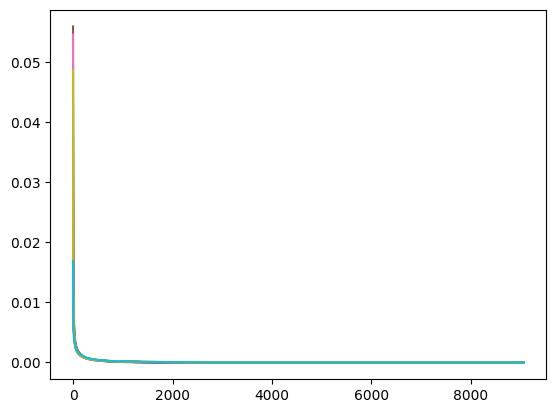

In [7]:
for i in topic_words:
    plt.plot([word[1] for word in i])

In [8]:
TW_low_probs = []
for topic in topic_words:
    topic_cleaned = []
    for pair in topic:
        if pair[1] >= 0.001:
            topic_cleaned.append(pair)
    TW_low_probs.append(topic_cleaned)

In [9]:
TW_low_probs

[[('колебание', 0.027999453),
  ('ток', 0.023576396),
  ('энергия', 0.014120514),
  ('напряжение', 0.013158282),
  ('частота', 0.011110386),
  ('контур', 0.009055793),
  ('электрический', 0.008607407),
  ('переменный', 0.008587457),
  ('электромагнитный', 0.008019357),
  ('генератор', 0.007932394),
  ('цепь', 0.007850598),
  ('конденсатор', 0.007826639),
  ('сопротивление', 0.007704227),
  ('полупроводник', 0.006153288),
  ('значение', 0.005891699),
  ('равный', 0.0054099928),
  ('амплитуда', 0.005212906),
  ('источник', 0.0051029883),
  ('переменный_ток', 0.0050672563),
  ('обмотка', 0.0050157825),
  ('колебательный', 0.0048326207),
  ('поле', 0.0045261597),
  ('помощь', 0.004525342),
  ('рисунок', 0.0044482583),
  ('мощность', 0.0042089997),
  ('катушка', 0.0041257525),
  ('период', 0.0040849126),
  ('передача', 0.0038935535),
  ('дырка', 0.0038157292),
  ('сигнал', 0.0037043071),
  ('больший', 0.0036864567),
  ('связь', 0.0036804485),
  ('система', 0.003549585),
  ('эдс', 0.00353726

In [10]:
for i in TW_low_probs:
    print(len(i))

201
174
198
176
197
213
170
205
174
221


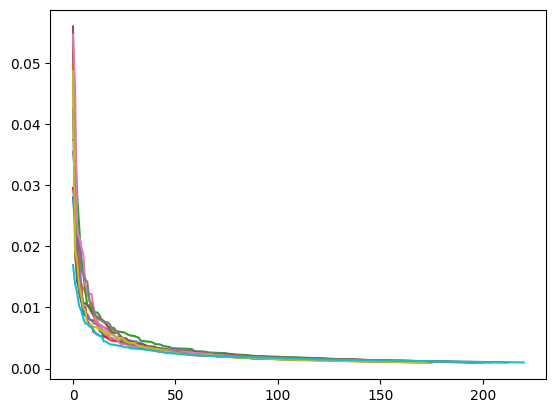

In [11]:
for i in TW_low_probs:
    plt.plot([word[1] for word in i])

In [12]:
trashhold = []
for topic in TW_low_probs:
    topic_probs = []
    for pair in topic:
            topic_probs.append(pair[1])
    trashhold.append(topic_probs)

In [13]:
trashhold

[[0.027999453,
  0.023576396,
  0.014120514,
  0.013158282,
  0.011110386,
  0.009055793,
  0.008607407,
  0.008587457,
  0.008019357,
  0.007932394,
  0.007850598,
  0.007826639,
  0.007704227,
  0.006153288,
  0.005891699,
  0.0054099928,
  0.005212906,
  0.0051029883,
  0.0050672563,
  0.0050157825,
  0.0048326207,
  0.0045261597,
  0.004525342,
  0.0044482583,
  0.0042089997,
  0.0041257525,
  0.0040849126,
  0.0038935535,
  0.0038157292,
  0.0037043071,
  0.0036864567,
  0.0036804485,
  0.003549585,
  0.00353726,
  0.003394266,
  0.0033651628,
  0.0032971043,
  0.003214708,
  0.0032145055,
  0.0031320485,
  0.0031298327,
  0.0030702937,
  0.003051191,
  0.0030496032,
  0.002914155,
  0.0029096075,
  0.0028894346,
  0.0028794694,
  0.0028779604,
  0.002849251,
  0.0028414137,
  0.002738033,
  0.0027218214,
  0.0026585087,
  0.0025986182,
  0.002539089,
  0.0024712735,
  0.0024448943,
  0.002336169,
  0.0023320573,
  0.002302781,
  0.002292434,
  0.002282381,
  0.0022778616,
  0.002

In [14]:
elbows = []
for probs in trashhold:
    elbow = 0
    for prob in probs:
        elbow += prob**2
    elbows.append(elbow)

In [15]:
elbows

[0.0033925367792151627,
 0.006016807338821106,
 0.007023370942350193,
 0.0038843527084731254,
 0.005163533183062602,
 0.006120469407053568,
 0.008757863601373917,
 0.0057397365386981265,
 0.004861505944375562,
 0.002059107588873052]

In [16]:
topic_terms_elbow = []
for idx in range(len(elbows)):
    topic_terms_to_elbow = []
    for pair in TW_low_probs[idx]:
        if pair[1] >= elbows[idx]:
            topic_terms_to_elbow.append(pair)
    topic_terms_elbow.append(topic_terms_to_elbow)    

In [17]:
topic_terms_elbow

[[('колебание', 0.027999453),
  ('ток', 0.023576396),
  ('энергия', 0.014120514),
  ('напряжение', 0.013158282),
  ('частота', 0.011110386),
  ('контур', 0.009055793),
  ('электрический', 0.008607407),
  ('переменный', 0.008587457),
  ('электромагнитный', 0.008019357),
  ('генератор', 0.007932394),
  ('цепь', 0.007850598),
  ('конденсатор', 0.007826639),
  ('сопротивление', 0.007704227),
  ('полупроводник', 0.006153288),
  ('значение', 0.005891699),
  ('равный', 0.0054099928),
  ('амплитуда', 0.005212906),
  ('источник', 0.0051029883),
  ('переменный_ток', 0.0050672563),
  ('обмотка', 0.0050157825),
  ('колебательный', 0.0048326207),
  ('поле', 0.0045261597),
  ('помощь', 0.004525342),
  ('рисунок', 0.0044482583),
  ('мощность', 0.0042089997),
  ('катушка', 0.0041257525),
  ('период', 0.0040849126),
  ('передача', 0.0038935535),
  ('дырка', 0.0038157292),
  ('сигнал', 0.0037043071),
  ('больший', 0.0036864567),
  ('связь', 0.0036804485),
  ('система', 0.003549585),
  ('эдс', 0.00353726

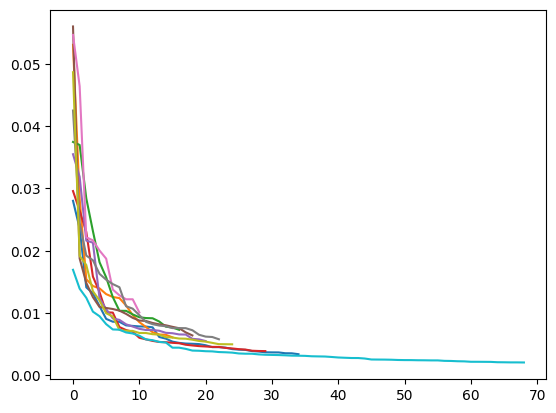

In [18]:
for i in topic_terms_elbow:
    plt.plot([word[1] for word in i])

In [22]:
for i in topic_terms_elbow:
    print(len(i))

35
16
17
30
21
19
11
23
25
69


In [23]:
trashhold_all_tokens = []
for topic in topic_words:
    topic_probs = []
    for pair in topic:
            topic_probs.append(pair[1])
    trashhold_all_tokens.append(topic_probs)

In [25]:
elbows_2 = []
for probs in trashhold_all_tokens:
    elbow = 0
    for prob in probs:
        elbow += prob**2
    elbows_2.append(elbow)

In [26]:
elbows_2

[0.0035607579758585987,
 0.006194093313149663,
 0.007151851298683365,
 0.00405713705253709,
 0.005298914835577202,
 0.006253981021719629,
 0.008893235524964571,
 0.0058831791696099265,
 0.005039466760460635,
 0.0022408793099895513]

In [39]:
topic_terms_elbow_2 = []
for idx in range(len(elbows_2)):
    topic_terms_to_elbow = []
    for pair in topic_words[idx]:
        if pair[1] >= elbows[idx]:
            topic_terms_to_elbow.append(pair)
    topic_terms_elbow_2.append(topic_terms_to_elbow)

In [40]:
topic_terms_elbow_2

[[('колебание', 0.027999453),
  ('ток', 0.023576396),
  ('энергия', 0.014120514),
  ('напряжение', 0.013158282),
  ('частота', 0.011110386),
  ('контур', 0.009055793),
  ('электрический', 0.008607407),
  ('переменный', 0.008587457),
  ('электромагнитный', 0.008019357),
  ('генератор', 0.007932394),
  ('цепь', 0.007850598),
  ('конденсатор', 0.007826639),
  ('сопротивление', 0.007704227),
  ('полупроводник', 0.006153288),
  ('значение', 0.005891699),
  ('равный', 0.0054099928),
  ('амплитуда', 0.005212906),
  ('источник', 0.0051029883),
  ('переменный_ток', 0.0050672563),
  ('обмотка', 0.0050157825),
  ('колебательный', 0.0048326207),
  ('поле', 0.0045261597),
  ('помощь', 0.004525342),
  ('рисунок', 0.0044482583),
  ('мощность', 0.0042089997),
  ('катушка', 0.0041257525),
  ('период', 0.0040849126),
  ('передача', 0.0038935535),
  ('дырка', 0.0038157292),
  ('сигнал', 0.0037043071),
  ('больший', 0.0036864567),
  ('связь', 0.0036804485),
  ('система', 0.003549585),
  ('эдс', 0.00353726

In [35]:
for i in topic_terms_elbow_2:
    print(len(i))

35
16
17
30
21
19
11
23
25
69


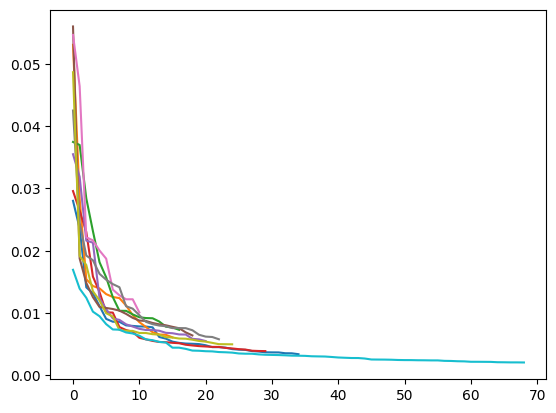

In [36]:
for i in topic_terms_elbow_2:
    plt.plot([word[1] for word in i])